## Step 1: Dataloader

In [1]:
# !pip install tensorboardX

import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import numpy as np
import time
import matplotlib.pyplot as plt

from torchvision import datasets, transforms
# from tensorboardX import SummaryWriter

use_cuda = True
device = torch.device("cuda" if use_cuda else "cpu")
batch_size = 64

np.random.seed(42)
torch.manual_seed(42)


## Dataloaders
train_dataset = datasets.MNIST('mnist_data/', train=True, download=False, transform=transforms.Compose(
    [transforms.ToTensor()]
))
test_dataset = datasets.MNIST('mnist_data/', train=False, download=False, transform=transforms.Compose(
    [transforms.ToTensor()]
))

train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size, shuffle=False)


## Step 2: Fully connected network

In [2]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(28*28, 50, bias=False)
        self.fc2 = nn.Linear(50,50, bias=False)
        self.fc3 = nn.Linear(50,50, bias=False)
        self.output = nn.Linear(50,10, bias=False)

    def forward(self, x):
        x = x.view((-1, 28*28))
        x1 = F.relu(self.fc1(x))
        x2 = F.relu(self.fc2(x1))
        x3 = F.relu(self.fc3(x2))
        yhat = self.output(x3)
        return yhat

model = Net()

model = model.to(device)
model.train()

Net(
  (fc1): Linear(in_features=784, out_features=50, bias=False)
  (fc2): Linear(in_features=50, out_features=50, bias=False)
  (fc3): Linear(in_features=50, out_features=50, bias=False)
  (output): Linear(in_features=50, out_features=10, bias=False)
)

## Step 3: Training and testing

In [3]:
num_epochs = 10
lr = 0.01
critetion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=lr)


def test(model):
    model.eval()
    num_correct = 0
    num_total = 0
    
    with torch.no_grad():
        for x, y in test_loader:
            x, y = x.to(device), y.to(device)
            yhat = model(x)
            _, yhat_label = torch.max(yhat, 1)
            
            num_total += y.shape[0]
            num_correct += (y == yhat_label).sum().item()
    print(f"Accuracy: {num_correct / num_total * 100}%")

for epoch in range(num_epochs):
    model.train()
    sum_loss = 0
    for batch_idx, (x, y) in enumerate(train_loader):
        x, y = x.to(device), y.to(device)
        
        optimizer.zero_grad()
        
        yhat = model(x)
        loss = critetion(yhat, y)
        
        loss.backward()
        optimizer.step()
        
        sum_loss += loss.item()
    print(f"Epoch {epoch}, loss {sum_loss}")
    test(model)
torch.save(model, "model.pth")
            

Epoch 0, loss 2035.977198600769
Accuracy: 49.07%
Epoch 1, loss 905.1497924029827
Accuracy: 81.78999999999999%
Epoch 2, loss 487.464797899127
Accuracy: 87.53%
Epoch 3, loss 379.6004304289818
Accuracy: 89.47%
Epoch 4, loss 328.0277834609151
Accuracy: 90.51%
Epoch 5, loss 296.43932612240314
Accuracy: 91.3%
Epoch 6, loss 272.4141902625561
Accuracy: 91.86999999999999%
Epoch 7, loss 251.13409079611301
Accuracy: 92.7%
Epoch 8, loss 231.29699300974607
Accuracy: 93.32000000000001%
Epoch 9, loss 214.13101840019226
Accuracy: 93.69%


## Step 4: Collecting parameter values and input intervals

In [5]:
model = torch.load('model.pth')
model.to('cpu')
W1 = model.fc1.weight.detach().numpy()
W2 = model.fc2.weight.detach().numpy()
W3 = model.fc3.weight.detach().numpy()
Wout = model.output.weight.detach().numpy()

print(W1.shape)

def get_interval(index:int, l_inf:float):
    image, label = test_dataset[index]
    image = image.view(-1, 28*28)
    l_image = image - l_inf
    u_image = image + l_inf
    return l_image.numpy()[0], u_image.numpy()[0], label

get_interval(0, 0.01)
    

(50, 784)


/tmp/ipykernel_1839/3067096357.py:1: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model = torch.load('model.pth')


(array([-0.01      , -0.01      , -0.01      , -0.01      , -0.01      ,
        -0.01      , -0.01      , -0.01      , -0.01      , -0.01      ,
        -0.01      , -0.01      , -0.01      , -0.01      , -0.01      ,
        -0.01      , -0.01      , -0.01      , -0.01      , -0.01      ,
        -0.01      , -0.01      , -0.01      , -0.01      , -0.01      ,
        -0.01      , -0.01      , -0.01      , -0.01      , -0.01      ,
        -0.01      , -0.01      , -0.01      , -0.01      , -0.01      ,
        -0.01      , -0.01      , -0.01      , -0.01      , -0.01      ,
        -0.01      , -0.01      , -0.01      , -0.01      , -0.01      ,
        -0.01      , -0.01      , -0.01      , -0.01      , -0.01      ,
        -0.01      , -0.01      , -0.01      , -0.01      , -0.01      ,
        -0.01      , -0.01      , -0.01      , -0.01      , -0.01      ,
        -0.01      , -0.01      , -0.01      , -0.01      , -0.01      ,
        -0.01      , -0.01      , -0.01      , -0.0

## Step 5: Interval analysis

In [6]:
def single_analysis(w:list, lx:list, ux:list):
    n = len(w) # dim. of x
    ly, uy = 0, 0
    for i in range(n):
        ux_bar = (lx[i] if w[i]<0 else ux[i])
        lx_bar = (lx[i] if w[i]>=0 else ux[i])
        ly += lx_bar * w[i]
        uy += ux_bar * w[i]
    return ly, uy

def multiple_analysis(w:list, lx:list, ux:list):
    ly, uy = list(), list()
    n = len(w) # dim. of y
    for i in range(n):
        wi = w[i]
        lyi, uyi = single_analysis(wi, lx, ux)
        ly.append(lyi)
        uy.append(uyi)
    return ly, uy
        
def interval_analysis(index:int, l_inf:float, silent=True):
    l0, u0, label = get_interval(index, l_inf)
    if not silent: display_together(l0, u0, 20)
    
    l1, u1 = multiple_analysis(W1.tolist(), l0, u0)
    if not silent: display_together(l1, u1, 20)
    
    l2, u2 = multiple_analysis(W2.tolist(), l1, u1)
    if not silent: display_together(l2, u2, 20)
    
    l3, u3 = multiple_analysis(W3.tolist(), l2, u2)
    if not silent: display_together(l3, u3, 20)
    
    lout, uout = multiple_analysis(Wout.tolist(), l3, u3)
    if not silent: display_together(lout, uout, 20, indent=True)
    
    return lout, uout, label

def display_together(l, u, max_index=None, indent=False):
    # print(len(l), len(u))
    if max_index is None:
        max_index = len(l)
    max_index = min(max_index, len(l))
    res = [(l[i], u[i]) for i in range(max_index)]
    if not indent:
        print(res)
    else:
        print('===================================')
        for r in res:
            print(r)
        print('===================================')
    
lout, uout, label = interval_analysis(5, 0.01, silent=False)

[(-0.01, 0.01), (-0.01, 0.01), (-0.01, 0.01), (-0.01, 0.01), (-0.01, 0.01), (-0.01, 0.01), (-0.01, 0.01), (-0.01, 0.01), (-0.01, 0.01), (-0.01, 0.01), (-0.01, 0.01), (-0.01, 0.01), (-0.01, 0.01), (-0.01, 0.01), (-0.01, 0.01), (-0.01, 0.01), (-0.01, 0.01), (-0.01, 0.01), (-0.01, 0.01), (-0.01, 0.01)]
[(-0.18293297511483086, 0.12168376724674007), (0.9463227052530298, 1.3460888817595957), (-0.07180751025480528, 0.3825850260174404), (0.20436871978638982, 0.5615043885595143), (0.009219180904546966, 0.3603610000423724), (1.384879113416171, 1.8326384552539616), (0.21526930051480292, 0.5913757811579687), (0.33684049647763936, 0.6906765309863427), (1.0678852318165293, 1.4759909888616247), (-0.6414608517721178, -0.32940573875316315), (0.14464274934876337, 0.4893594160199862), (0.35449988406658983, 0.7630306707091212), (0.23895351497515913, 0.5942409599887523), (-0.6735342189551607, -0.3313267159878851), (0.9429529745538329, 1.3047111494414516), (0.21635690170246907, 0.5305667425731418), (2.07771

In [7]:
def single_verification(lout, uout, label):
    min_label = lout[label]
    is_always_greater = 1
    for i in range(len(lout)):
        if i != label:
            if uout[i] > min_label:
                is_always_greater = 0
    return is_always_greater

def multiple_verification(begin_i, end_i, l_inf):
    sum, total = 0, end_i - begin_i
    for i in range(begin_i, end_i):
        lout, uout, label = interval_analysis(i, l_inf)
        is_verified = single_verification(lout, uout, label)
        # print(f"index: {i}, label: {label}, is_verified: {is_verified}")
        sum += is_verified
    return sum / total

for l_inf in np.linspace(0.01, 0.1, 10):
    acc = multiple_verification(10, 30, l_inf)
    print(f"l_inf: {l_inf}, acc: {acc * 100}%")

l_inf: 0.01, acc: 0.0%
l_inf: 0.020000000000000004, acc: 0.0%
l_inf: 0.030000000000000006, acc: 0.0%
l_inf: 0.04000000000000001, acc: 0.0%
l_inf: 0.05000000000000001, acc: 0.0%
l_inf: 0.06000000000000001, acc: 0.0%
l_inf: 0.07, acc: 0.0%
l_inf: 0.08, acc: 0.0%
l_inf: 0.09000000000000001, acc: 0.0%
l_inf: 0.1, acc: 0.0%


## Step Additional: Network robustness evaluation by PGD attack

In [80]:
from torch.utils.data import Subset

class PGD_optimizer():
    # ref: https://www.geeksforgeeks.org/custom-optimizers-in-pytorch/
    def __init__(self, params, original_params, epsilon, lr=1e-2):
        self.params = list(params)
        self.original_params = original_params
        self.epsilon = epsilon
        self.lr = lr
                
    def step(self):
        with torch.no_grad():
            for param in self.params:
                if param.grad is not None:
                    if torch.max(torch.abs(param.grad.data)) == 0:
                        print("warning: all gradients are 0")
                    param.data = param.data - self.lr * param.grad.data
                else:
                    print("warning: param.grad is None")
                param.data = torch.clamp(
                    param.data, 
                    min = (self.original_params.data - self.epsilon), 
                    max = (self.original_params.data + self.epsilon)
                )
    
    def zero_grad(self):
        for param in self.params:
            if param.grad is not None:
                param.grad.zero_()

num_samples = 7
mini_dataset = Subset(test_dataset, range(num_samples))
mini_loader = torch.utils.data.DataLoader(mini_dataset, batch_size=num_samples, shuffle=False)
for i in range(num_samples):
    print(mini_dataset[i][1])
images_labels = next(iter(mini_loader))

7
2
1
0
4
1
4


In [81]:
target_label = torch.LongTensor([5]*num_samples).to(device)
num_epochs = 500

model.eval()
model.to(device)

def pgd_attack(epsilon):
    print(f'epsilon: {epsilon}')
    
    images, labels = images_labels
    images = images.clone().detach().to(device)
    labels = labels.to(device)
    images_original = images.clone().detach()
    criterion = nn.CrossEntropyLoss()
    
    for epoch in range(num_epochs):
        optimizer = PGD_optimizer([images], images_original, epsilon)
        images.requires_grad = True
        optimizer.zero_grad()
        yhat = model(images)
        loss = criterion(yhat, target_label)
        # print(epoch, loss.item())
        loss.backward()
        # print(images.grad.data)
        optimizer.step()
        images = images.detach().clone()
    
    assert torch.max(torch.abs(images_original - images)) != 0
    assert torch.max(torch.abs(images_original - images)) <= 1.1 * epsilon
    
    print("#####", torch.max(model(images), 1)[1], "#####")
    return images

a = pgd_attack(0.1)

epsilon: 0.1


##### tensor([5, 5, 5, 0, 8, 5, 5], device='cuda:0') #####


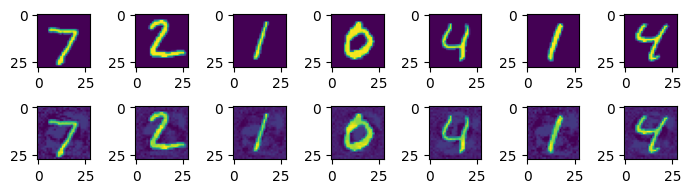

In [82]:
from matplotlib import pyplot as pyplot

def show_images(original_images:torch.Tensor, attacked_images:torch.Tensor):
    original_images = original_images.cpu().numpy()
    attacked_images = attacked_images.cpu().numpy()
    num_images = original_images.shape[0]
    
    plt.figure(figsize=(7, 2))
    for i in range(num_images):
        plt.subplot(2, num_images, i+1)
        plt.imshow(original_images[i].reshape(28, 28))
        plt.subplot(2, num_images, i+num_images+1)
        plt.imshow(attacked_images[i].reshape(28, 28))
    plt.tight_layout()
    plt.show()

show_images(images_labels[0], a)

epsilon: 0.05


##### tensor([7, 2, 1, 0, 4, 1, 4], device='cuda:0') #####


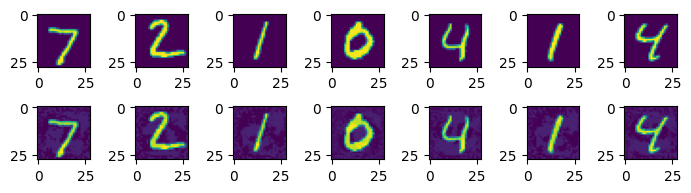

In [83]:
a = pgd_attack(0.05)
show_images(images_labels[0], a)

epsilon: 0.01


##### tensor([7, 2, 1, 0, 4, 1, 4], device='cuda:0') #####


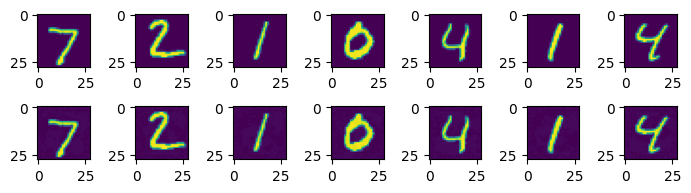

In [84]:
a = pgd_attack(0.01)
show_images(images_labels[0], a)